<a href="https://colab.research.google.com/github/Dennieeeee/Real-Estate-House-Price-Prediction/blob/master/Boston_House_Price_Prediction(PART2_EDA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
file='https://raw.githubusercontent.com/Dennieeeee/Real-Estate-House-Price-Prediction/master/boston_housing_revised'
df=pd.read_csv(file)

In [3]:
df.head(1)

,sale_type,property_type,address,city,state_or_province,zip_code,price,beds,baths,location,square_feet,lot_size,year_built,amount_per_square_feet,HOA_per_month,status,favorite,interested,latitude,longitude
0,MLS Listing,Condo/Co-op,1466 Commonwealth Ave #1,Boston,MA,2135,599000,3.0,1.0,Brighton,1346.0,1346.0,1925.0,445.0,451.0,Active,N,Y,42.347122,-71.140307


In [4]:
df.describe()

,zip_code,price,beds,baths,square_feet,lot_size,year_built,amount_per_square_feet,HOA_per_month,latitude,longitude
count,104.000000,1.040000e+02,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000
mean,2124.750000,7.941856e+05,2.038462,1.504808,1100.692308,1653.355769,1933.000000,773.250000,1400.096154,42.336454,-71.074177
std,17.345574,3.750656e+05,0.762254,0.568148,453.428858,2073.397460,47.773535,303.177789,9771.941939,0.027203,0.035292
min,2108.000000,3.999000e+05,1.000000,1.000000,375.000000,375.000000,1858.000000,237.000000,110.000000,42.260633,-71.169289
25%,2117.500000,5.499750e+05,2.000000,1.000000,798.000000,798.000000,1899.000000,494.500000,209.500000,42.331017,-71.084485
50%,2122.000000,6.870000e+05,2.000000,1.000000,1011.500000,1031.000000,1905.000000,744.000000,343.000000,42.341268,-71.069261
75%,2128.000000,8.605000e+05,2.000000,2.000000,1337.250000,1467.250000,1987.500000,1024.000000,452.000000,42.352837,-71.052316
max,2215.000000,2.495000e+06,5.000000,3.000000,3633.000000,9999.000000,2020.000000,1704.000000,99999.000000,42.390130,-70.995862


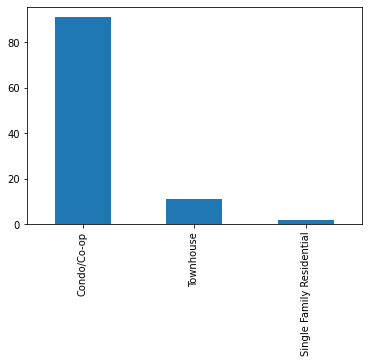

In [5]:
df['property_type'].value_counts().plot(kind='bar')

In [6]:
df['sale_type'].value_counts()

MLS Listing    104
Name: sale_type, dtype: int64

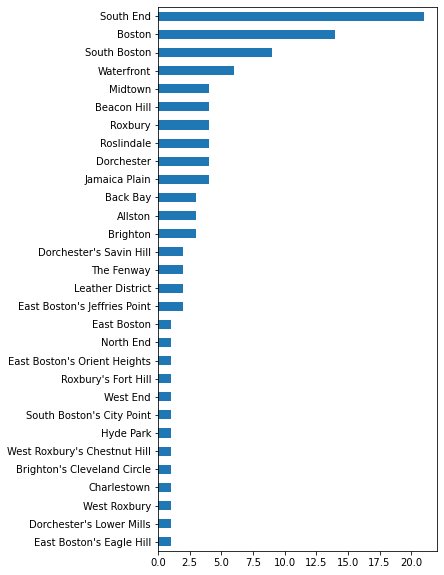

In [7]:
df['location'].value_counts().sort_values().plot(kind='barh',figsize=(5,10))
#South End has the most houses available for sell

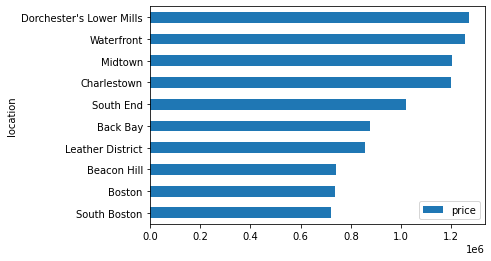

In [8]:
#Top 10 location with the lowest average price
#South End is relatively low in average price
#Boston is also relatively low in average price and have many houses
top10_location = df.groupby(['location']).agg({'price':'mean'}).sort_values(['price']).tail(10)
top10_location.plot(kind='barh')

In [9]:
df.groupby(['property_type']).agg({'price':'mean'}).sort_values('price')

,price
property_type,
Townhouse,679245.454545
Condo/Co-op,804885.692308
Single Family Residential,939500.000000


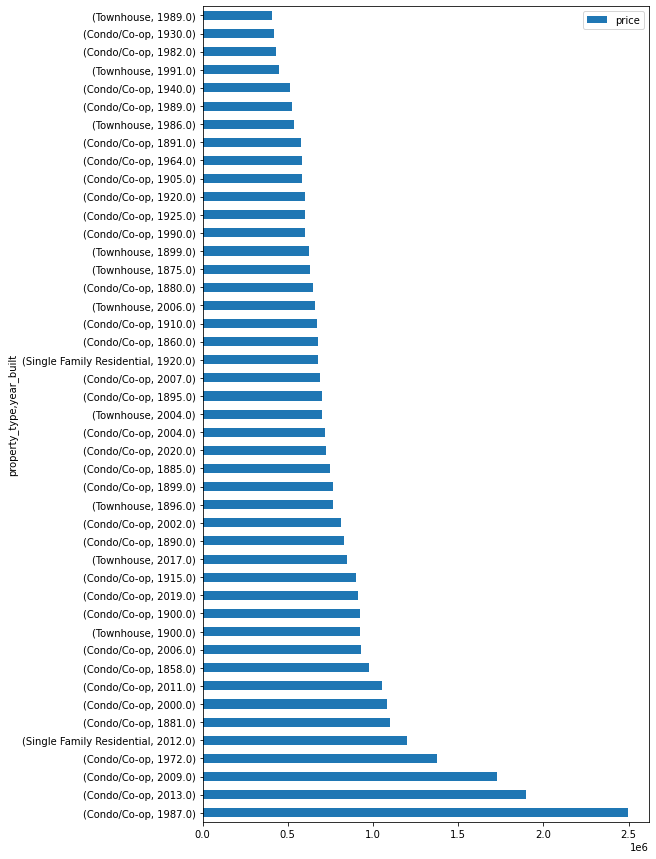

In [10]:
avg_price = df.groupby(['property_type','year_built']).agg({'price':'mean'}).sort_values(['price'],ascending=False)#这个方括号可要可不要
avg_price.plot(kind='barh',figsize=(8,15))

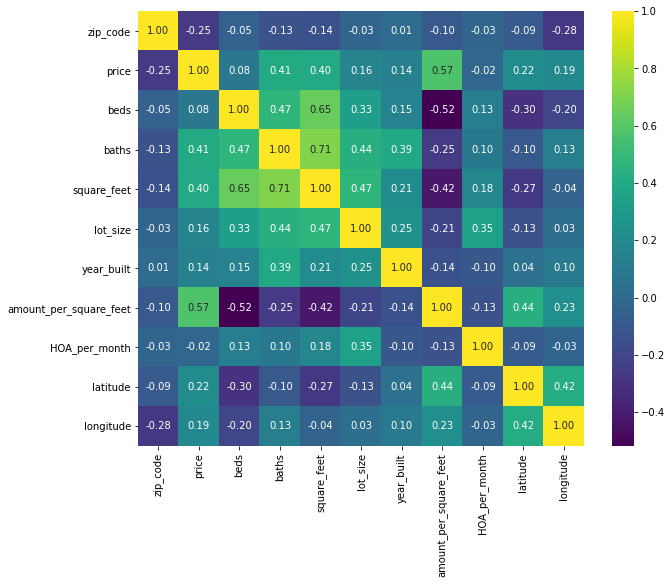

In [11]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True,cmap="viridis", fmt="0.2f")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4fe1a15198>,
      dtype=object)

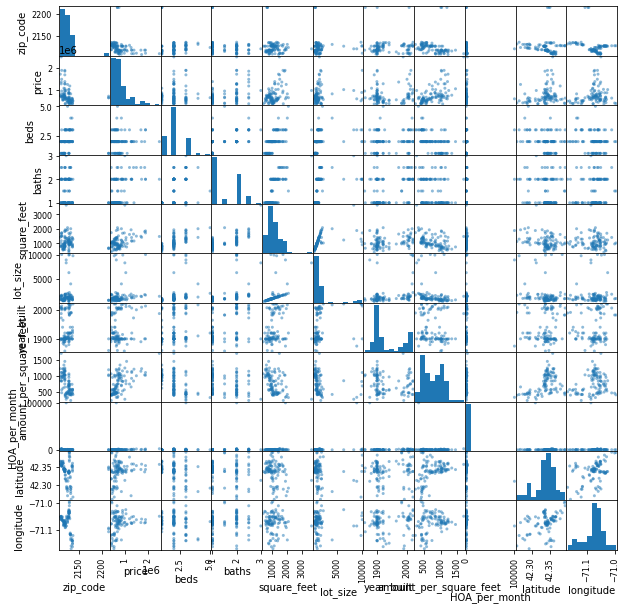

In [12]:
pd.plotting.scatter_matrix(df,figsize=(10,10))

In [13]:
#compare 2 beds houses price and other houses price
df['beds'].value_counts()

2.0    58
1.0    23
3.0    20
4.0     2
5.0     1
Name: beds, dtype: int64

In [17]:
df[df['beds']==2].head(1)

,sale_type,property_type,address,city,state_or_province,zip_code,price,beds,baths,location,square_feet,lot_size,year_built,amount_per_square_feet,HOA_per_month,status,favorite,interested,latitude,longitude
2,MLS Listing,Condo/Co-op,20 Leverett Ave #2,Boston,MA,2128,439900,2.0,1.5,Boston,948.0,948.0,1982.0,464.0,389.0,Active,N,Y,42.388069,-71.000369


'\nm = df2["sex"] == 1\nplt.scatter(df2.loc[m, "height"], df2.loc[m, "weight"], c="#16c6f7", s=1, label="Male")\nplt.scatter(df2.loc[~m, "height"], df2.loc[~m, "weight"], c="#ff8b87", s=1, label="Female")\nplt.xlabel("Height")\nplt.ylabel("Weight")\nplt.legend(loc=2);\n'

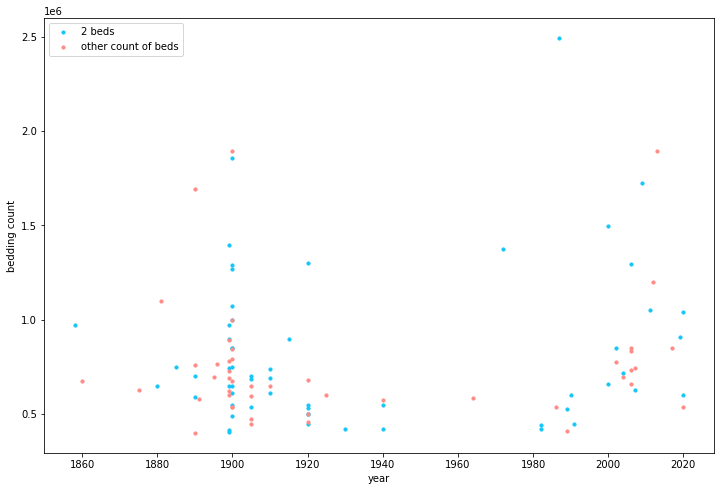

In [32]:
#这哪里不对？？？
plt.figure(figsize=(12,8))
m = df["beds"] == 2
plt.scatter(df.loc[m, "year_built"], df.loc[m, "price"], c="#16c6f7", s=10, label="2 beds") #s is the dot size
plt.scatter(df.loc[~m, "year_built"], df.loc[~m, "price"], c="#ff8b87", s=10, label="other count of beds")
plt.xlabel("year")
plt.ylabel("bedding count")
plt.legend(loc=2);

'''
m = df2["sex"] == 1
plt.scatter(df2.loc[m, "height"], df2.loc[m, "weight"], c="#16c6f7", s=1, label="Male")
plt.scatter(df2.loc[~m, "height"], df2.loc[~m, "weight"], c="#ff8b87", s=1, label="Female")
plt.xlabel("Height")
plt.ylabel("Weight")
plt.legend(loc=2);
'''

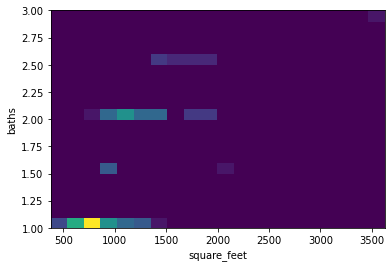

In [14]:
plt.hist2d(df["square_feet"], df["baths"], bins=20, cmap="magma")
plt.xlabel("square_feet")
plt.ylabel("baths");